https://www.tapology.com/fightcenter/events/130754-ufc-fight-night

In [112]:
from tensorflow.keras import layers, models ,regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, BatchNormalization, Dense, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, ELU
from tensorflow.keras.activations import gelu


import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

import keras
from sklearn.metrics import brier_score_loss, roc_auc_score, accuracy_score, confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt

from math import isfinite


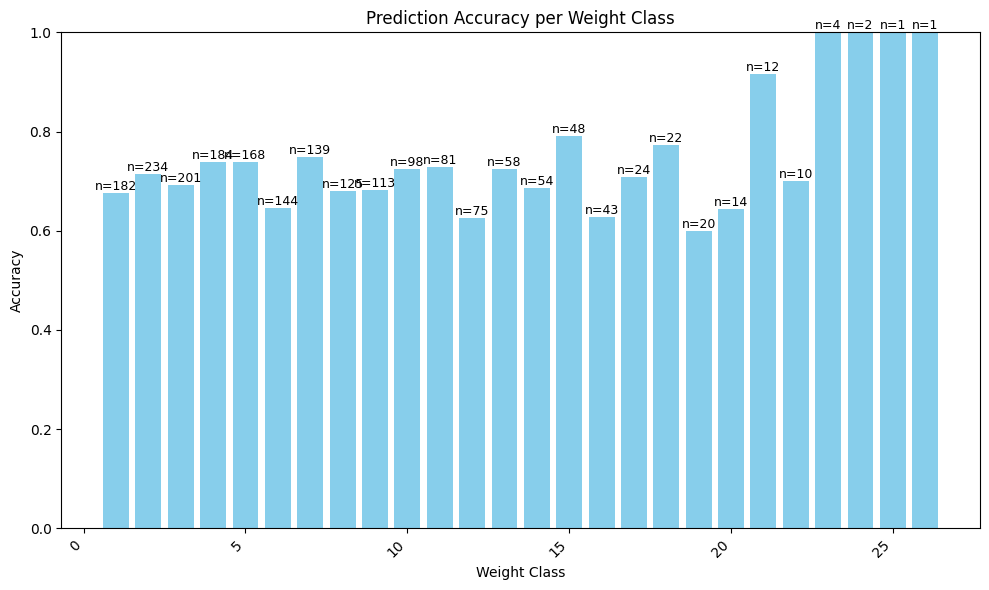

In [132]:
grouped = df_results.groupby("num_fights_red")["correct_pred"].agg(["mean", "count"])

# --- Plot ---
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped.index, grouped["mean"], color="skyblue")

plt.title("Prediction Accuracy per Weight Class")
plt.ylabel("Accuracy")
plt.xlabel("Weight Class")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")

# --- Annotate with sample counts ---
for bar, count, acc in zip(bars, grouped["count"], grouped["mean"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,   # x-position
        bar.get_height(),                    # y-position (top of bar)
        f"n={count}",                        # text
        ha="center", va="bottom", fontsize=9
    )

plt.tight_layout()
plt.show()

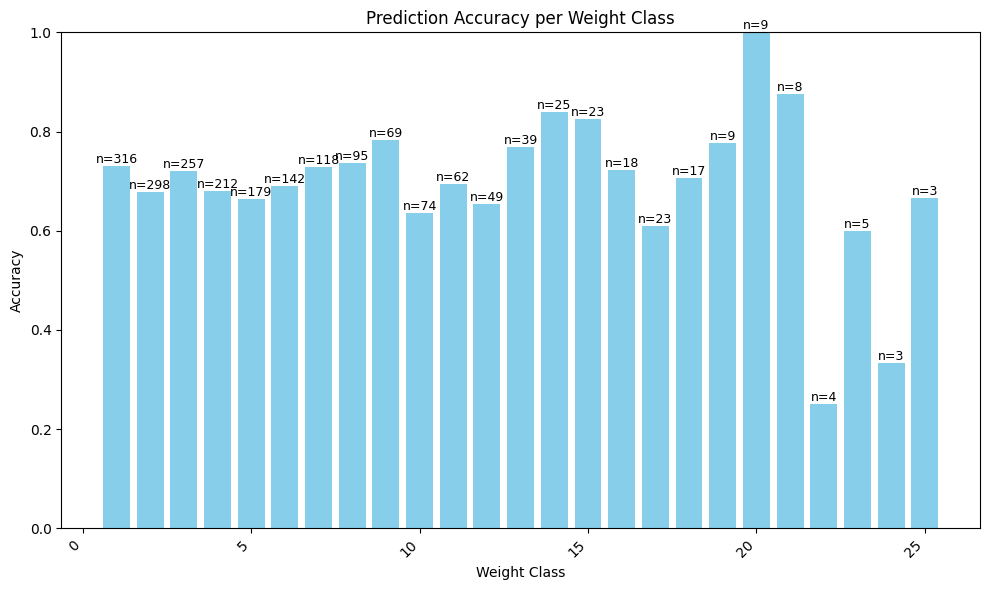

In [133]:
grouped = df_results.groupby("num_fights_blue")["correct_pred"].agg(["mean", "count"])

# --- Plot ---
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped.index, grouped["mean"], color="skyblue")

plt.title("Prediction Accuracy per Weight Class")
plt.ylabel("Accuracy")
plt.xlabel("Weight Class")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")

# --- Annotate with sample counts ---
for bar, count, acc in zip(bars, grouped["count"], grouped["mean"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,   # x-position
        bar.get_height(),                    # y-position (top of bar)
        f"n={count}",                        # text
        ha="center", va="bottom", fontsize=9
    )

plt.tight_layout()
plt.show()

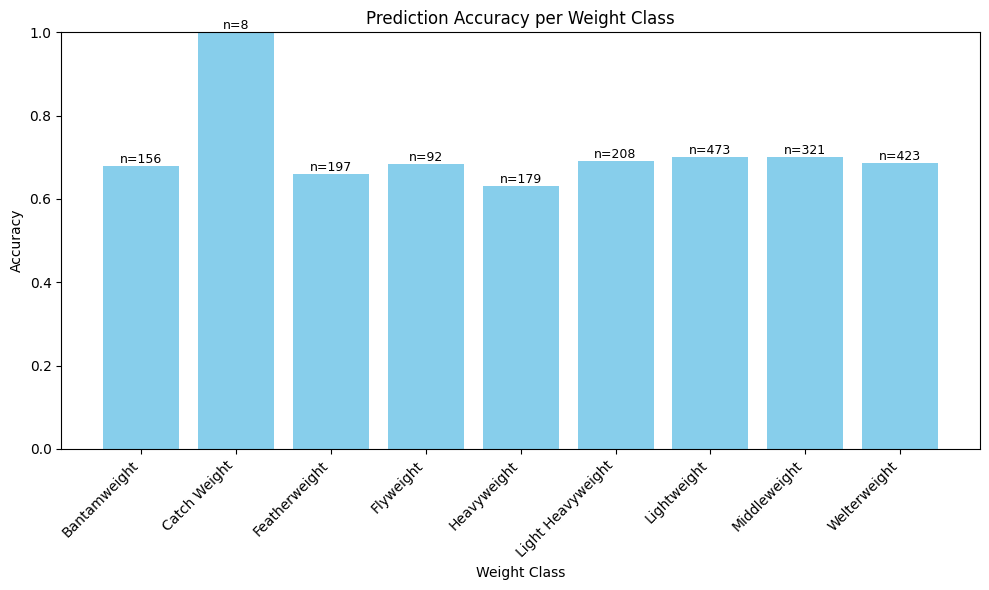

In [101]:
grouped = df_results.groupby("weight_class")["correct_pred"].agg(["mean", "count"])

# --- Plot ---
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped.index, grouped["mean"], color="skyblue")

plt.title("Prediction Accuracy per Weight Class")
plt.ylabel("Accuracy")
plt.xlabel("Weight Class")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")

# --- Annotate with sample counts ---
for bar, count, acc in zip(bars, grouped["count"], grouped["mean"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,   # x-position
        bar.get_height(),                    # y-position (top of bar)
        f"n={count}",                        # text
        ha="center", va="bottom", fontsize=9
    )

plt.tight_layout()
plt.show()

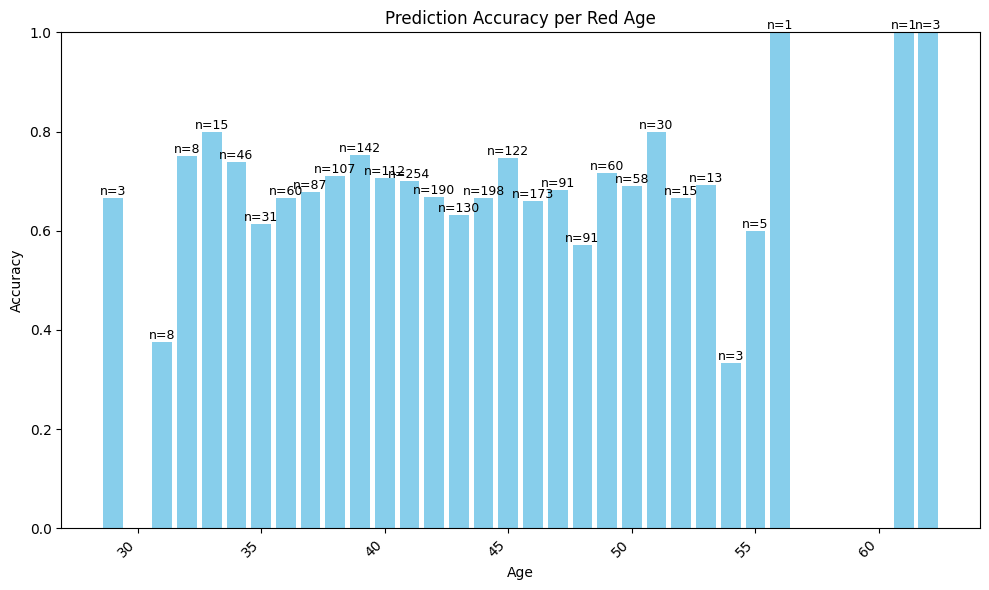

In [104]:
grouped = df_results.groupby("red_age")["correct_pred"].agg(["mean", "count"])

# --- Plot ---
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped.index, grouped["mean"], color="skyblue")

plt.title("Prediction Accuracy per Red Age")
plt.ylabel("Accuracy")
plt.xlabel("Age")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")

# --- Annotate with sample counts ---
for bar, count, acc in zip(bars, grouped["count"], grouped["mean"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,   # x-position
        bar.get_height(),                    # y-position (top of bar)
        f"n={count}",                        # text
        ha="center", va="bottom", fontsize=9
    )

plt.tight_layout()
plt.show()

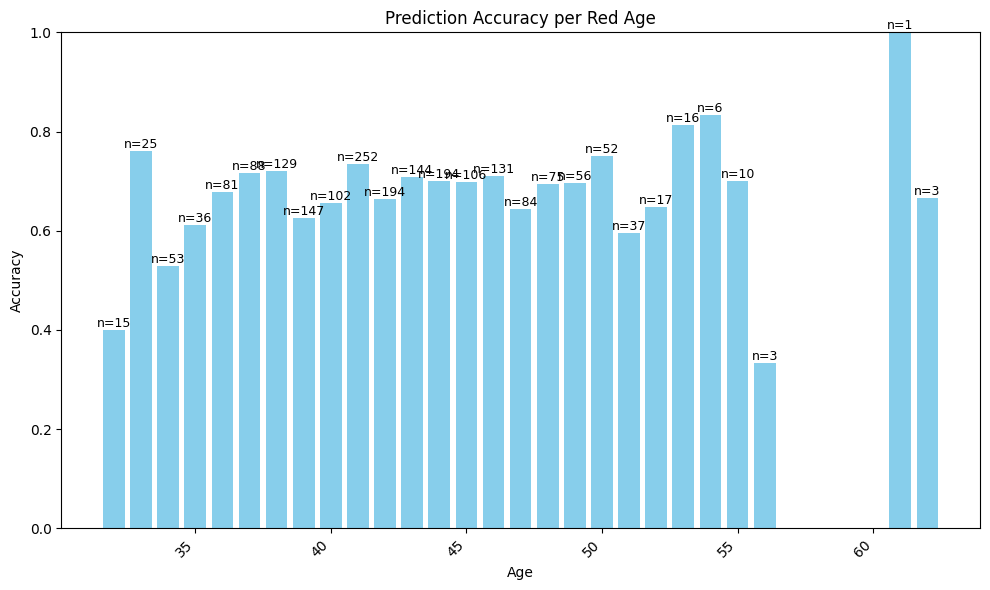

In [106]:
grouped = df_results.groupby("blue_age")["correct_pred"].agg(["mean", "count"])

# --- Plot ---
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped.index, grouped["mean"], color="skyblue")

plt.title("Prediction Accuracy per Red Age")
plt.ylabel("Accuracy")
plt.xlabel("Age")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")

# --- Annotate with sample counts ---
for bar, count, acc in zip(bars, grouped["count"], grouped["mean"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,   # x-position
        bar.get_height(),                    # y-position (top of bar)
        f"n={count}",                        # text
        ha="center", va="bottom", fontsize=9
    )

plt.tight_layout()
plt.show()

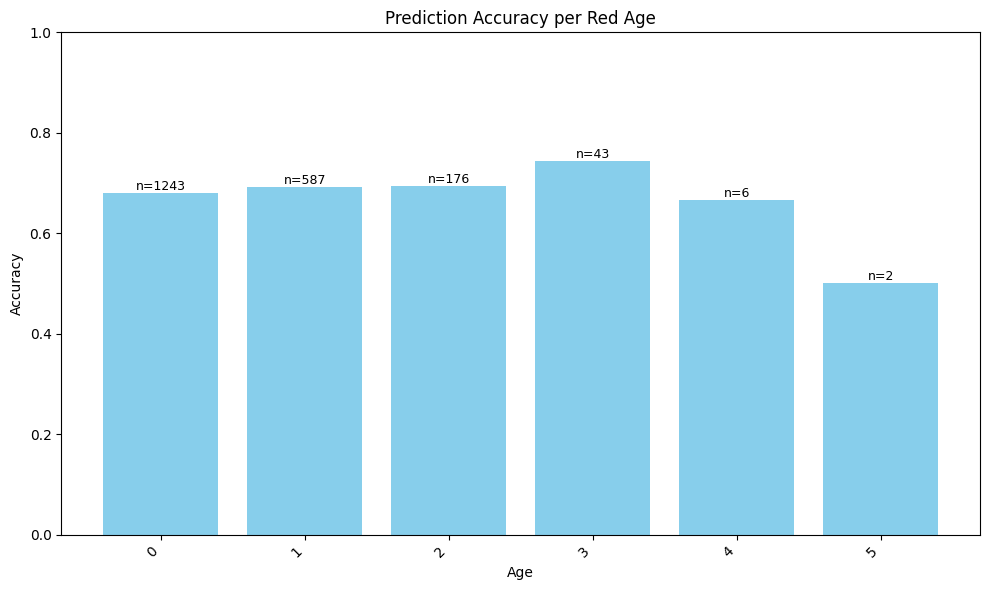

In [109]:
grouped = df_results.groupby("red_lose_streak")["correct_pred"].agg(["mean", "count"])

# --- Plot ---
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped.index, grouped["mean"], color="skyblue")

plt.title("Prediction Accuracy per red_lose_streak")
plt.ylabel("Accuracy")
plt.xlabel("Age")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")

# --- Annotate with sample counts ---
for bar, count, acc in zip(bars, grouped["count"], grouped["mean"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,   # x-position
        bar.get_height(),                    # y-position (top of bar)
        f"n={count}",                        # text
        ha="center", va="bottom", fontsize=9
    )

plt.tight_layout()
plt.show()

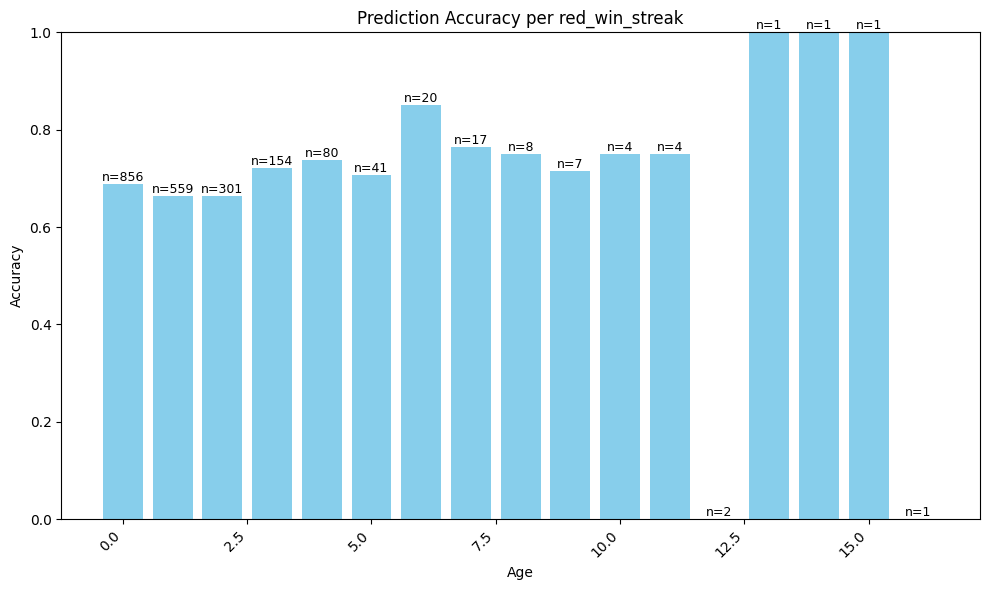

In [110]:
grouped = df_results.groupby("red_win_streak")["correct_pred"].agg(["mean", "count"])

# --- Plot ---
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped.index, grouped["mean"], color="skyblue")

plt.title("Prediction Accuracy per red_win_streak")
plt.ylabel("Accuracy")
plt.xlabel("Age")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")

# --- Annotate with sample counts ---
for bar, count, acc in zip(bars, grouped["count"], grouped["mean"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,   # x-position
        bar.get_height(),                    # y-position (top of bar)
        f"n={count}",                        # text
        ha="center", va="bottom", fontsize=9
    )

plt.tight_layout()
plt.show()

In [43]:
train_answers = pd.DataFrame()
train_answers['blue_probs'] = nn_probs_2d_train[:,0]
train_answers['red_probs'] = nn_probs_2d_train[:,1]
train_answers['pred_winner'] = np.argmax(nn_probs_2d_train, axis=1)

train_answers['winner'] = copy_df.iloc[:train_len]['winner'].reset_index(drop=True)
# test_answers['winner'] = y_test.reset_index(drop=True)
train_answers['correct_pred'] = (train_answers['pred_winner'] == train_answers['winner']).astype(int)
train_answers['event_dates'] = copy_df.iloc[:train_len]['date'].reset_index(drop=True)

train_answers['open_red'] = copy_df.iloc[:train_len]['open_red'].reset_index(drop=True)
train_answers['open_blue'] = copy_df.iloc[:train_len]['open_blue'].reset_index(drop=True)

train_answers['close1_red'] = copy_df.iloc[:train_len]['close1_red'].reset_index(drop=True)
train_answers['close1_blue'] = copy_df.iloc[:train_len]['close1_blue'].reset_index(drop=True)

train_answers['close2_red'] = copy_df.iloc[:train_len]['close2_red'].reset_index(drop=True)
train_answers['close2_blue'] = copy_df.iloc[:train_len]['close2_blue'].reset_index(drop=True)

train_answers['event_dates'] = copy_df.iloc[:train_len]['date'].reset_index(drop=True)
train_answers['red_fighter'] = copy_df.iloc[:train_len]['red_fighter'].reset_index(drop=True)
train_answers['blue_fighter'] = copy_df.iloc[:train_len]['blue_fighter'].reset_index(drop=True)

train_answers.info()
print(train_answers.info())

train_answers.to_csv(r'C:\Users\jcmar\my_files\SportsBetting\data\model_results_train_v2.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4253 entries, 0 to 4252
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   blue_probs    4253 non-null   float32
 1   red_probs     4253 non-null   float32
 2   pred_winner   4253 non-null   int64  
 3   winner        4253 non-null   int64  
 4   correct_pred  4253 non-null   int64  
 5   event_dates   4253 non-null   object 
 6   open_red      4253 non-null   float64
 7   open_blue     4253 non-null   float64
 8   close1_red    4253 non-null   float64
 9   close1_blue   4253 non-null   float64
 10  close2_red    4253 non-null   float64
 11  close2_blue   4253 non-null   float64
 12  red_fighter   4253 non-null   object 
 13  blue_fighter  4253 non-null   object 
dtypes: float32(2), float64(6), int64(3), object(3)
memory usage: 432.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4253 entries, 0 to 4252
Data columns (total 14 columns):
 #   Column        Non

In [44]:
test_answers = pd.DataFrame()
    # "close1_blue",
    # "close2_red",
    # "close2_blue",
    # "close1_red",

test_answers['blue_probs'] = nn_probs_2d[:,0]
test_answers['red_probs'] = nn_probs_2d[:,1]
test_answers['pred_winner'] = np.argmax(nn_probs_2d, axis=1)

test_answers['winner'] = copy_df.iloc[train_len:]['winner'].reset_index(drop=True)
# test_answers['winner'] = y_test.reset_index(drop=True)
test_answers['correct_pred'] = (test_answers['pred_winner'] == test_answers['winner']).astype(int)
test_answers['event_dates'] = copy_df.iloc[train_len:]['date'].reset_index(drop=True)

test_answers['open_red'] = copy_df.iloc[train_len:]['open_red'].reset_index(drop=True)
test_answers['open_blue'] = copy_df.iloc[train_len:]['open_blue'].reset_index(drop=True)

test_answers['close1_red'] = copy_df.iloc[train_len:]['close1_red'].reset_index(drop=True)
test_answers['close1_blue'] = copy_df.iloc[train_len:]['close1_blue'].reset_index(drop=True)

test_answers['close2_red'] = copy_df.iloc[train_len:]['close2_red'].reset_index(drop=True)
test_answers['close2_blue'] = copy_df.iloc[train_len:]['close2_blue'].reset_index(drop=True)

test_answers['event_dates'] = copy_df.iloc[train_len:]['date'].reset_index(drop=True)
test_answers['red_fighter'] = copy_df.iloc[train_len:]['red_fighter'].reset_index(drop=True)
test_answers['blue_fighter'] = copy_df.iloc[train_len:]['blue_fighter'].reset_index(drop=True)

test_answers.info()
print(test_answers.info())

test_answers.to_csv(r'C:\Users\jcmar\my_files\SportsBetting\data\model_results_v2.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   blue_probs    751 non-null    float32
 1   red_probs     751 non-null    float32
 2   pred_winner   751 non-null    int64  
 3   winner        751 non-null    int64  
 4   correct_pred  751 non-null    int64  
 5   event_dates   751 non-null    object 
 6   open_red      751 non-null    float64
 7   open_blue     751 non-null    float64
 8   close1_red    751 non-null    float64
 9   close1_blue   751 non-null    float64
 10  close2_red    751 non-null    float64
 11  close2_blue   751 non-null    float64
 12  red_fighter   751 non-null    object 
 13  blue_fighter  751 non-null    object 
dtypes: float32(2), float64(6), int64(3), object(3)
memory usage: 76.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 14 columns):
 #   Column        Non-Null